<h1> Pricing a European Call Option with the Black-Scholes Equation </h1>

The <a href="https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_equation">Black-Scholes equation</a> predicts the prices of an option from the underlying stock price, volatility, strike price, risk-free interest rate, and time to maturity. 

This notebook defines the Black-Scholes equation and provides some examples that can be played with to get a better feel for the equation.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.family'] = 'serif'

The function below uses the Black-Scholes equation to determine the price of a <a href="https://en.wikipedia.org/wiki/Option_style#American_and_European_optionsEuropean">European</a> <a href="https://en.wikipedia.org/wiki/Call_option">call</a> option. The variable d1 determines the normal distribution describing the variation in the underlying stock price, while d2 determines the normal distribution determining the strike price.

In [3]:
def european_call_option_price(S, sigma, T, X, r, q=0):
    """returns the price of a european call option determined using the Black-Scholes equation

    S: :float
        Stock price of option
    sigma: Volatility of option expressed on an annual basis
    T: :float
        Time to maturity of option, represented as fraction of a year (e.g. T=0.5 represents 6 months)
    X: :float
        Strike price of option
    r: :float
        Risk-free interest rate
    q: :float
        Dividend rate. Optional, default 0 (i.e. defaults to non-dividend paying)

    returns 
    : :float
        Price of european call option
    """
    
    d1 = (np.log(S/X) + (r - q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    return S*np.exp(-q*T)*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)

As an example, consider a European call option with price £200, strike price of £220, 6 months to maturity, a risk-free interest rate of 1% and volatility of 0.2. The Black-Scholes equation values this option at £4.68. This is cheap as the stock price is less than the strike price, so it is out of the money.

In [4]:
S = 200
X = 220
T = 0.5
r = 0.01
sigma = 0.2

print(f"European call option valuation: £{np.round(european_call_option_price(S, sigma, T, X, r), 2)}")

European call option valuation: £4.68


Plotting the stock price from £100 to £300 we can see that for values far below the strike price, the option is worthless. This is because with only 6 months to maturity, and given the stocks volatility, it is very unlikely to end up in the money before maturity.

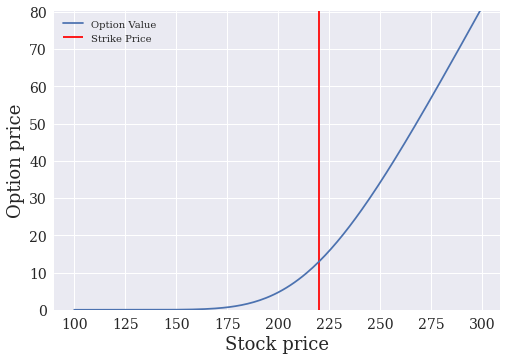

In [5]:
S = np.arange(100, 300)
prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)

plt.plot(S, prices, label="Option Value")
plt.vlines(X, ymin=0, ymax=prices.max(), colors='r', label="Strike Price")
plt.ylim(0, prices.max())
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.legend()

Increasing the volatility to 0.5 increases the liklihood of the option ending up in the money, and so the option is more valuable even at lower stock prices.

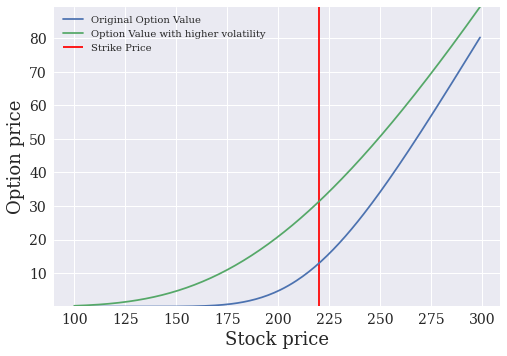

In [6]:
prices = european_call_option_price(S=S, sigma=0.5, T=T, X=X, r=r)
original_prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)

plt.plot(S, original_prices, label="Original Option Value")
plt.plot(S, prices, label="Option Value with higher volatility")
plt.vlines(X, ymin=prices.min(), ymax=prices.max(), colors='r', label="Strike Price")
plt.ylim(prices.min(), prices.max())
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.legend()

Similarly, increasing the time to maturity to 10 years gives more time for the stock price to rise above the strike price, increasing the options value (especially given the risk free interest rate).

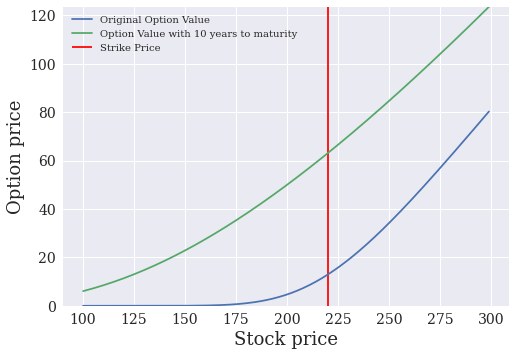

In [7]:
prices = european_call_option_price(S=S, sigma=sigma, T=10, X=X, r=r)
original_prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)

plt.plot(S, original_prices, label="Original Option Value")
plt.plot(S, prices, label="Option Value with 10 years to maturity")
plt.vlines(X, ymin=0, ymax=prices.max(), colors='r', label="Strike Price")
plt.ylim(0, prices.max())
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.legend()

Increasing the risk-free interest rate to 2% slightly increases the value of the option at lower stock prices, but not by much as there is only 6 months to maturity, which is not long enough for the interest rates to be important.

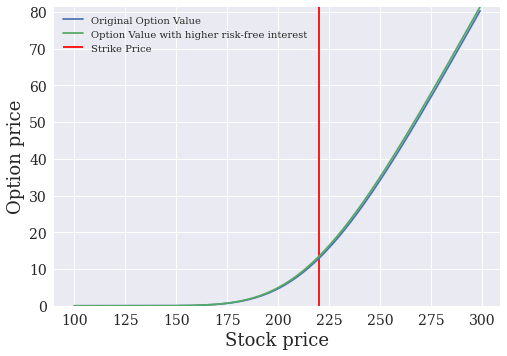

In [8]:
prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=0.02)
original_prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)

plt.plot(S, original_prices, label="Original Option Value")
plt.plot(S, prices, label="Option Value with higher risk-free interest")
plt.vlines(X, ymin=0, ymax=prices.max(), colors='r', label="Strike Price")
plt.ylim(0, prices.max())
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.legend()

Here we change to a dividend paying stock, paying a continuous rate of 0.02. Similar to interest rates, with only six months to maturity this has little affect on the price.

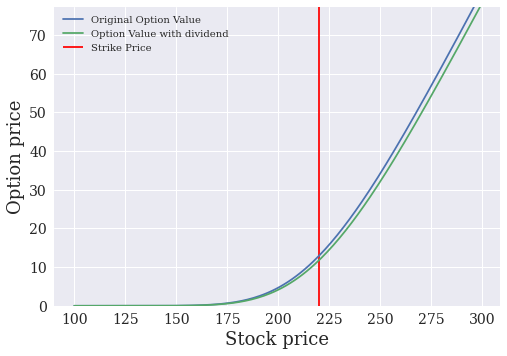

In [9]:
original_prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)
prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r, q=0.02)

plt.plot(S, original_prices, label="Original Option Value")
plt.plot(S, prices, label="Option Value with dividend")
plt.vlines(X, ymin=0, ymax=prices.max(), colors='r', label="Strike Price")
plt.ylim(0, prices.max())
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.legend()

Below we see what happens when the strike price is lowered to £180. As expected, the price of the option increases as it is now in the money.

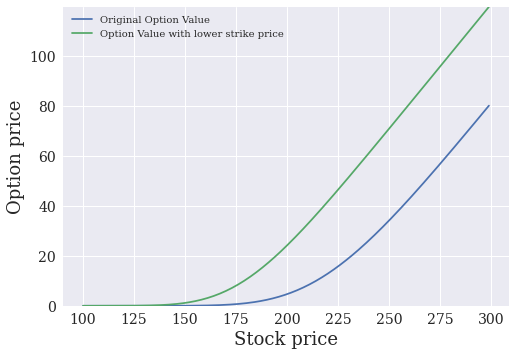

In [10]:
original_prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)
prices = european_call_option_price(S=S, sigma=sigma, T=T, X=180, r=r)

plt.plot(S, original_prices, label="Original Option Value")
plt.plot(S, prices, label="Option Value with lower strike price")
plt.ylim(0, prices.max())
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.legend()

Fixing the stock price at £200 and allowing the strike price to vary from £120 to £220 we can see that a lower strike price favourable, as it means the option is more likely to be in the money at maturity.

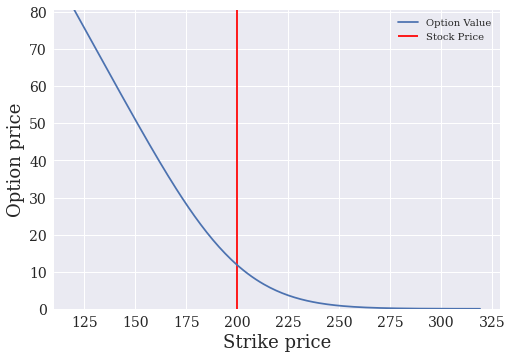

In [11]:
S = 200
X = np.arange(120, 320)
prices = european_call_option_price(S=S, sigma=sigma, T=T, X=X, r=r)

plt.plot(X, prices, label="Option Value")
plt.vlines(S, ymin=0, ymax=prices.max(), colors='r', label="Stock Price")
plt.ylim(0, prices.max())
plt.xlabel("Strike price")
plt.ylabel("Option price")
plt.legend()